In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

fecha = '04-22'
ds = '../../data/' + fecha + '-dataset.csv'
numerical_ds = '../../data/' + fecha + '-dataset-numerical.csv'

df = pd.read_csv(ds)
df = df.drop(columns=['user','replay','group'])
df_numerical = pd.read_csv(numerical_ds)


Vamos a comprobar cómo de bueno es el modelo usando todos los datos. Si los resultados no son buenos, como se espera, probaremos con un modelo para cada puzle.

In [2]:
X = df_numerical.drop(columns=['spatial_reasoning'])
y = df_numerical['spatial_reasoning']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

c:\Users\ana12\Desktop\TFG\scripts\TFG\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The r2 is:  0.7412363153040751


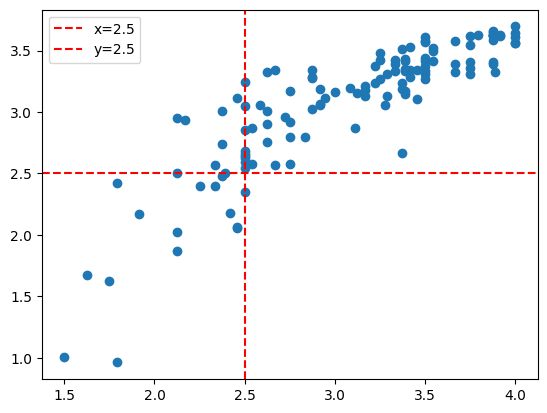

In [3]:
train_pred = model.predict(X_train)
r2 = r2_score(y_train, train_pred)
rmse = mean_squared_error(y_train, train_pred, squared=False)

print('The r2 is: ', r2)

plt.scatter(y_train,train_pred)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='r', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()



The r2 is:  0.582018433657677


c:\Users\ana12\Desktop\TFG\scripts\TFG\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


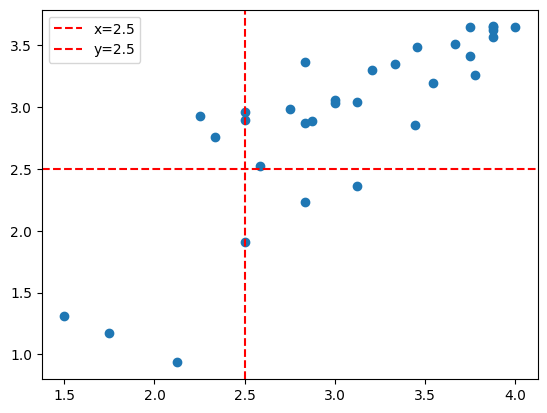

In [4]:
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)

plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='r', linestyle='--', label='y=2.5')


# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


Vamos a probar quitando las figuras, puesto que son las características con menos correlación con la variable objetivo.

In [5]:
X = df_numerical.drop(columns=['spatial_reasoning','cube','sphere','ramp','cylinder','cone','pyramid'])
y = df_numerical['spatial_reasoning']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

for i in range(len(y_test)):
    print(y_test.iloc[i], predictions[i])

c:\Users\ana12\Desktop\TFG\scripts\TFG\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.5953589518341611
The r2 is:  0.5953589518341611
The rmse is:  0.4160222841819681
1.5 1.5969745646688054
2.583333333333333 2.492537928589249
3.5416666666666665 3.234993461755754
3.458333333333333 3.4680718750831927
3.75 3.6425152566956553
2.5 2.915099773813984
3.875 3.660893174619635
1.75 1.1841036869702495
3.875 3.5645336942349592
2.833333333333333 2.2878883749005183
3.4444444444444446 2.927524481013057
3.875 3.6023622380045444
2.5 2.899874168302106
2.5 1.7759477804542052
2.125 0.9465476886600253
3.125 3.1056658127596344
3.125 2.3199234133860873
2.333333333333333 2.777817331910149
3.0 3.0094597102000957
2.833333333333333 2.87157296321017
3.777777777777778 3.2849875350846562
2.833333333333333 3.22161893292026
3.208333333333333 3.3459579193553317
3.0 3.025578374093513
4.0 3.6328727353004693
3.6666666666666665 3.5040001461117956
3.875 3.644077943885828
2.875 2.85990480323933
3.75 3.410550006927153
2.25 2.9177974489923084
3.333333333333333 3.3219607601129555
2.75 2.9271092138186


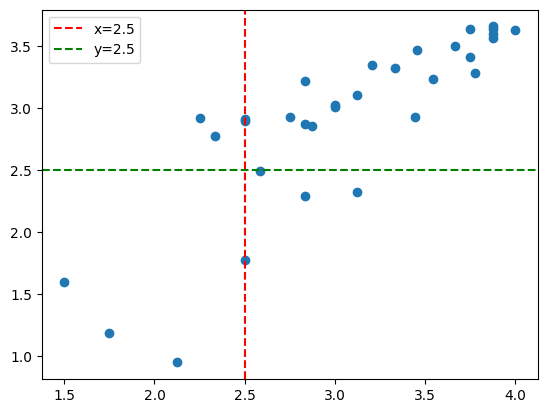

In [6]:
plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='g', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


El resultado es muy parecido al anterior: 2 falsos positivos y 1 falso negativo. Vamos a probar con un modelo para cada puzle.

In [7]:
pi_henge = df.loc[df['puzzle']=='Pi Henge']
pi_henge = pi_henge.drop(columns=['puzzle'])
X = pi_henge.drop(columns=['spatial_reasoning'])
y = pi_henge['spatial_reasoning']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.816557346987971
The rmse is:  0.2590210394637976


c:\Users\ana12\Desktop\TFG\scripts\TFG\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


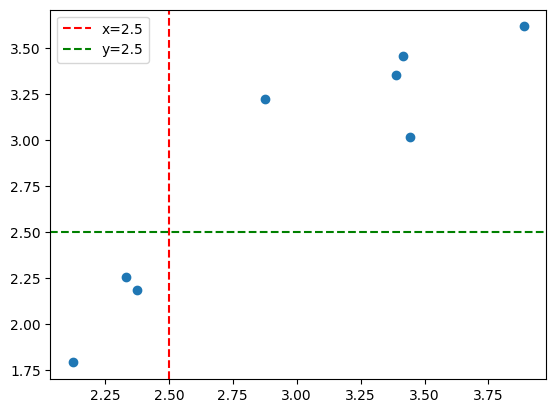

In [8]:
plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='g', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [9]:
bird_fez = df.loc[df['puzzle']=='Bird Fez']
bird_fez = bird_fez.drop(columns=['puzzle'])
X = bird_fez.drop(columns=['spatial_reasoning'])
y = bird_fez['spatial_reasoning']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.4091747791431395
The rmse is:  0.2588993112355938


c:\Users\ana12\Desktop\TFG\scripts\TFG\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


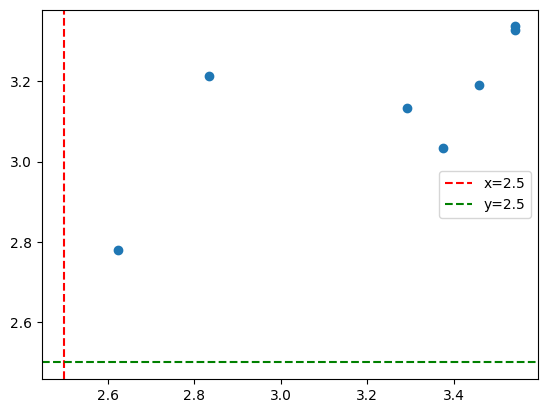

In [10]:
plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='g', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [11]:
degree_rotations = df.loc[df['puzzle']=='45-Degree Rotations']
degree_rotations = degree_rotations.drop(columns=['puzzle'])
X = degree_rotations.drop(columns=['spatial_reasoning'])
y = degree_rotations['spatial_reasoning']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.6633129481796872
The rmse is:  0.2840151512952844


c:\Users\ana12\Desktop\TFG\scripts\TFG\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


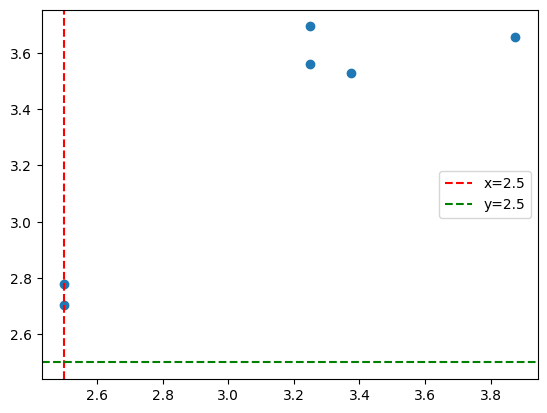

In [12]:
plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='g', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [13]:
angled_silhouette = df.loc[df['puzzle']=='Angled Silhouette']
angled_silhouette = angled_silhouette.drop(columns=['puzzle'])
X = angled_silhouette.drop(columns=['spatial_reasoning'])
y = angled_silhouette['spatial_reasoning']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  -0.11179331296909334
The rmse is:  0.4613070439636605


c:\Users\ana12\Desktop\TFG\scripts\TFG\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


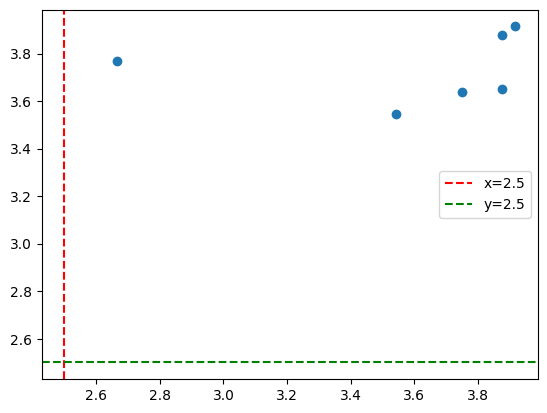

In [14]:
plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='g', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [15]:
pyramids = df.loc[df['puzzle']=='Pyramids are Strange']
pyramids = pyramids.drop(columns=['puzzle'])
X = pyramids.drop(columns=['spatial_reasoning'])
y = pyramids['spatial_reasoning']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  -2.703046853784753
The rmse is:  0.7699161597527695


c:\Users\ana12\Desktop\TFG\scripts\TFG\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


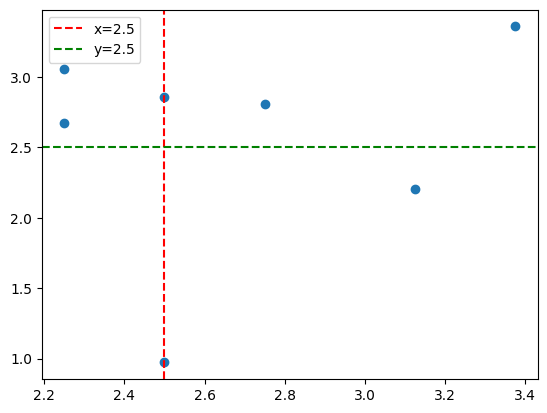

In [16]:
plt.scatter(y_test,predictions)

# Pintar las rectas x=2.5 e y=2.5
plt.axvline(x=2.5, color='r', linestyle='--', label='x=2.5')
plt.axhline(y=2.5, color='g', linestyle='--', label='y=2.5')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


La regresión lineal funciona bastante bien para este problema.